## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [2]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [3]:
#answer below:
#drop the 'beer' column
lager = lager.drop(['beer'], axis=1)

Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [4]:
# answer below:
from sklearn.model_selection import train_test_split

#split data with test_size=.25
X = lager.drop(['tpc'], axis=1)
y = lager['tpc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Next, we'll generate a linear model and make a residual vs. fit (homoscedasticity) plot. All Gauss-Markov assumptions should be evaluated on the training set.

How much heteroscedasticity is exhibited in the model?

In [5]:
#answer below:
#make linear model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Mean of errors is: -2.3211062701496606e-14


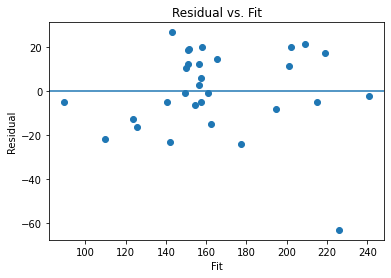

In [6]:
#plot residual and fit of model using y_train
y_train_pred = linear.predict(X_train)
train_errors = (y_train - y_train_pred)
print('Mean of errors is: {}'.format(np.mean(train_errors)))

plt.scatter(y_train_pred, train_errors)
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Fit')
plt.show()

Between 0 to 125 (based off X-axis) there is data below the 0 of the residual line but there are none above in the same area. Also the one data point below at -60 of the residual line looks like an outlier since nothing surrounding the data point.

Compute the VIF for all features in the model. You will need to add a constant to your data (make a new copy just for this) to compute this with statsmodels.

How collinear are your features?

In [7]:
#import VIF and add constant(sm)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# answer below:
X_train_const = add_constant(X)
vif = pd.Series([variance_inflation_factor(X_train_const.values, i) for i in range (X_train_const.shape[1])], index=X_train_const.columns)
vif

const    25.231110
ma        1.408874
dsa       2.752283
asa       1.824640
orac      1.631315
rp        2.357123
mca       1.485338
dtype: float64

Based off the variance inflation factor we have a low collinearilty between the features. 

Show a histogram of your error, and then plot the qq-plot for our errors (make sure to use a standardized line to compare them appropriately to the standard distribution.)

Remember to use training data.

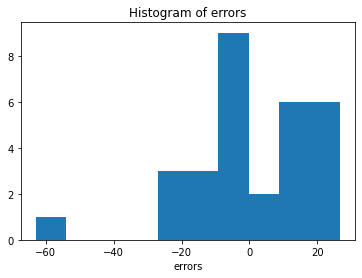

In [9]:
# answer below:
#histogram of error
plt.hist(train_errors)
plt.xlabel('errors')
plt.title('Histogram of errors')
plt.show()

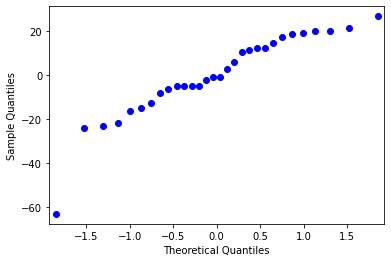

In [18]:
# answer below:
#qq-plot
import statsmodels.api as sm
import pylab
sm.qqplot(train_errors)
pylab.show()

Plot the actual test data against test predictions to see how well your model predicts new data.

In [11]:
# answer below:
#pred = y_train_pred
#actual = y_train
from scipy.stats import jarque_bera, normaltest

jb_stats = jarque_bera(train_errors)
norm_stats = normaltest(train_errors)

print('Jarque-Bera test statistic is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normal test statistic is {0} and p-value is {1}'. format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistic is 13.750052584825001 and p-value is 0.0010332704711170093
Normal test statistic is 13.07374774135145 and p-value is 0.0014490112225018972


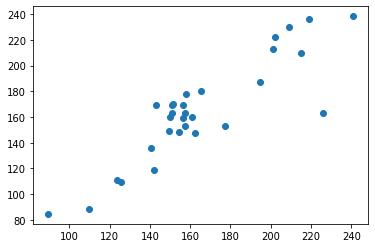

In [12]:
plt.scatter(y_train_pred, y_train)
plt.show()